# Exercise: Regularization with Cross-validation  
The aim of this exercise is to understand regularization with cross-validation.  
![4.3.3.image.png](4.3.3.image.png)  

### Instructions:  
- Initializing the required parameters for this exercise. This can be viewed in the scaffold.  
- Read the data file `polynomial50.csv` and assign the predictor and response variables.  
- Use the helper code to visualize the data.  
- Define a function `reg_with_validation` that performs Ridge regularization by taking a random_state parameter.  
    - Split the data into train and validation sets by specifying the random_state.  
    - Compute the polynomial features for the train and validation sets using a degree of 30.  
    - Run a loop for the alpha values. Within the loop:  
        - Initialize the Ridge regression model with the specified alpha.  
        - Fit the model on the training data and predict and on the train and validation set.  
        - Compute the MSE of the train and validation prediction.  
        - Store these values in lists.  
- Run `reg_with_validation` for varying random states and plot a graph that depicts the best alpha value and the best MSE. The graph will be similar to the one given above.  
- Define a function `reg_with_cross_validation` that performs Ridge regularization with cross-validation by taking a random_state parameter.  
    - Use the pandas sample function to sample the data using the specified random state.  
    - Assign the predictor and response variables using the sampled data.  
    - Run a loop for the alpha values. Within the loop:  
        - Initialize the Ridge regression model with the specified alpha.  
        - Fit the model on the entire data and using cross-validation with 5 folds.  
        - Get the train and validation MSEs by taking their mean.  
        - Store these values in lists.  
- Run `reg_with_cross_validation` for varying random states and plot a graph that depicts the best alpha value and the best MSE.  
- Use the helper code given to print your best MSEs in the case of simple validation and cross-validation for different random states.  



Hints:
df.sample()
Returns a random sample of items from an axis of the object.

sklearn.cross_validate()
Evaluate metric(s`by cross-validation and also record fit/score times.

np.mean()
Compute the arithmetic mean along the specified axis.

sklearn.RidgeRegression()
Linear least squares with l2 regularization.

sklearn.fit()
Fit Ridge egression model.

sklearn.predict()
Predict using the linear model.

sklearn.mean_squared_error()
Mean squared error regression loss

sklearn.PolynomialFeatures()
Generate polynomial and interaction features.

sklearn.fit_transform()
Fit to data, then transform it.

In [18]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
%matplotlib inline

In [19]:
# Initialising required parameters

# The list of random states
ran_state = [0, 10, 21, 42, 66, 109, 310, 1969]

# The list of alpha for regularization
alphas = [1e-7,1e-5, 1e-3, 0.01, 0.1, 1]

# The degree of the polynomial to use in this exercise
degree = 30
    

In [20]:
# Read the file 'polynomial50.csv' as a dataframe
df = pd.read_csv('polynomial50.csv')

# Assign the values of the 'x' column as the predictor
x = df[['x']].values

# Assign the values of the 'y' column as the response
y = df['y'].values

# Also assign the true value of the function (column 'f') to the variable f 
f = df['f'].values

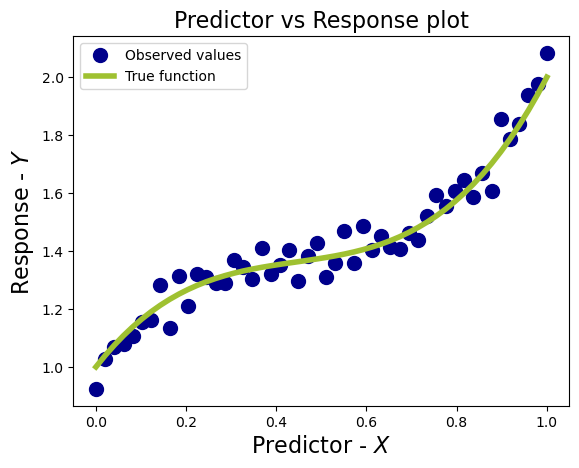

In [21]:
# Use the helper code below to visualise the distribution of the x, y values & also the value of the true function f

fig, ax = plt.subplots()

# Plot x vs y values
ax.plot(x,y, 'o', label = 'Observed values',markersize=10 ,color = 'Darkblue')

# Plot x vs true function value
ax.plot(x,f, label = 'True function',linewidth=4,color ='#9FC131FF')

ax.legend(loc = 'best');
ax.set_xlabel('Predictor - $X$',fontsize=16)
ax.set_ylabel('Response - $Y$',fontsize=16)
ax.set_title('Predictor vs Response plot',fontsize=16);

In [22]:
# Function to perform regularization with simple validation
def reg_with_validation(rs):
    
    # Split the data into train and validation sets with train size as 80% and random_state as
    x_train, x_val, y_train, y_val = train_test_split(x,y, train_size = 0.8, random_state=rs)

    # Create two lists for training and validation error
    training_error, validation_error = [],[]

    # Compute the polynomial features train and validation sets
    # Use the degree defined at the top of this notebook
    x_poly_train = PolynomialFeatures(degree=degree).fit_transform(x_train)
    x_poly_val= PolynomialFeatures(degree=degree).fit_transform(x_val)

    # Run a loop for all alpha values
    for alpha in alphas:

        # Initialise a Ridge regression model by specifying the alpha and with fit_intercept=False
        ridge_reg = Ridge(alpha=alpha, fit_intercept=False)
        
        # Fit on the modified training data
        ridge_reg.fit(x_poly_train, y_train)

        # Predict on the training set 
        y_train_pred = ridge_reg.predict(x_poly_train)
        
        # Predict on the validation set 
        y_val_pred = ridge_reg.predict(x_poly_val)
        
        # Compute the training and validation mean squared errors
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_val = mean_squared_error(y_val, y_val_pred)

        # Append the MSEs to their respective lists 
        training_error.append(mse_train)
        validation_error.append(mse_val)
    
    # Return the train and validation MSE
    return training_error, validation_error


In [23]:
#AAA
#x_train, x_val, y_train, y_val = train_test_split(x,y, train_size = 0.8, random_state=1)
#x_poly_train = PolynomialFeatures(degree=degree).fit_transform(x_train)
#x_poly_val= PolynomialFeatures(degree=degree).fit_transform(x_val)
#x_train.shape, x_val.shape, y_train.shape, y_val.shape, x_poly_train.shape, x_poly_val.shape

In [24]:
#x.shape, y.shape

In [25]:
#AAAA
##training_error, validation_error = reg_with_validation(rs)
#training_error, validation_error


In [26]:
#AAA
#validation_error.index(min(validation_error))

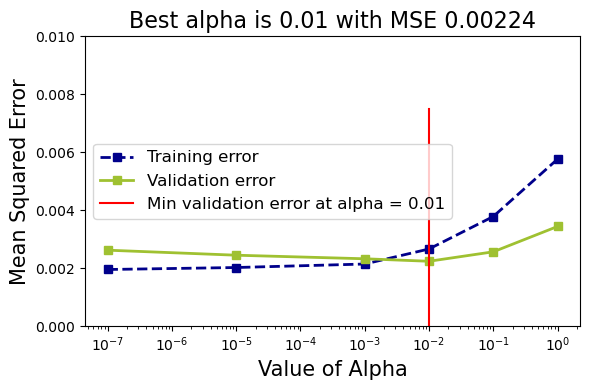

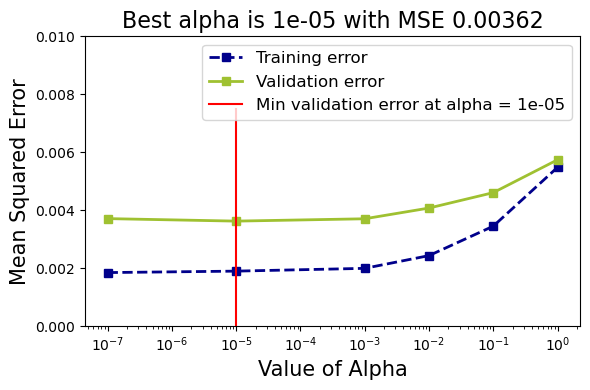

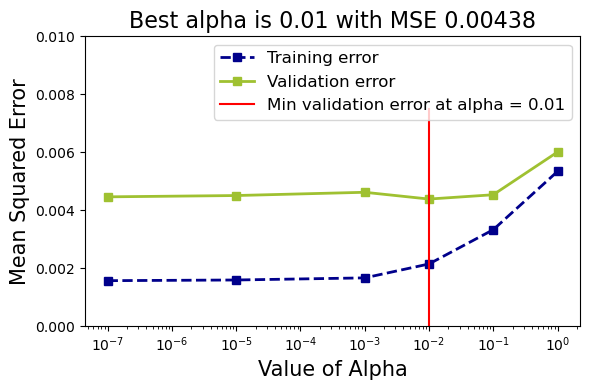

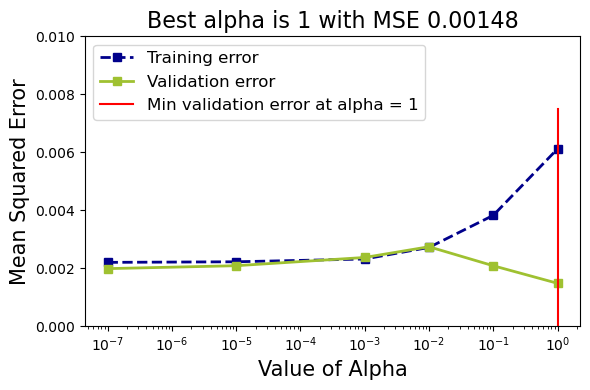

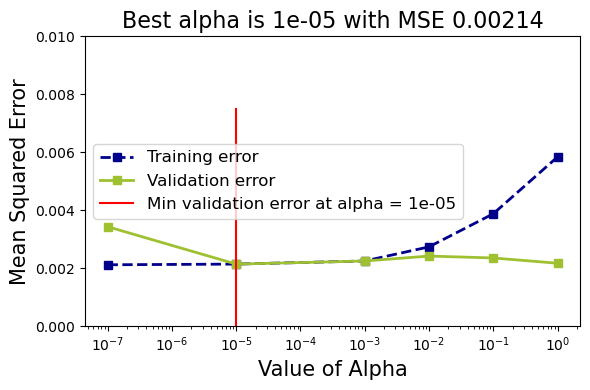

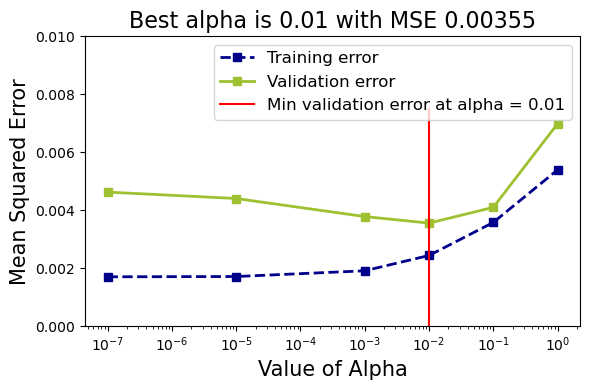

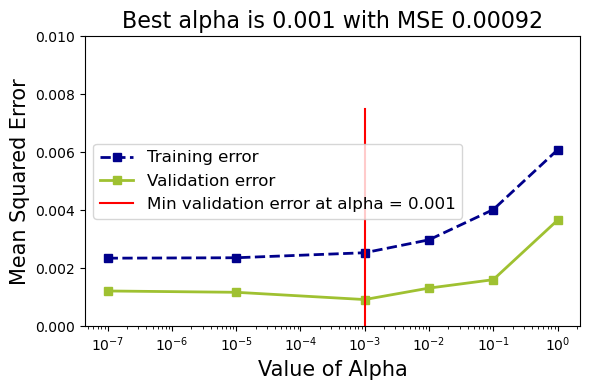

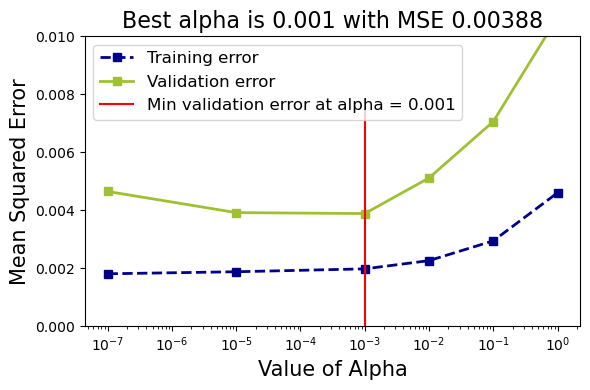

In [27]:
### edTest(test_validation) ###
# Initialise a list to store the best alpha using simple validation for varying random states
best_alpha = []

# Run a loop for different random_states
for rs in ran_state:
    
    # Get the train and validation error by calling the function reg_with_validation
    training_error, validation_error = reg_with_validation(rs)

    # Get the best mse from the validation_error list
    best_mse  = min(validation_error)
    
    # Get the best alpha value based on the best mse
    best_parameter = alphas[validation_error.index(best_mse)]
    
    # Append the best alpha to the list
    best_alpha.append(best_parameter)
    
    # Use the helper code given below to plot the graphs
    fig, ax = plt.subplots(figsize = (6,4))
    
    # Plot the training errors for each alpha value
    ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)
    
    # Plot the validation errors for each alpha value
    ax.plot(alphas,validation_error,'s-', label = 'Validation error',color ='#9FC131FF',linewidth=2 )

    # Draw a vertical line at the best parameter
    ax.axvline(best_parameter, 0, 0.75, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

    ax.set_xlabel('Value of Alpha',fontsize=15)
    ax.set_ylabel('Mean Squared Error',fontsize=15)
    ax.set_ylim([0,0.010])
    ax.legend(loc = 'best',fontsize=12)
    bm = round(best_mse, 5)
    ax.set_title(f'Best alpha is {best_parameter} with MSE {bm}',fontsize=16)
    ax.set_xscale('log')
    plt.tight_layout()
    plt.show()

In [28]:
# Function to perform regularization with cross validation
def reg_with_cross_validation(rs):
    
    # Sample your data to get different splits using the random state
    df_new = df.sample(frac=1, random_state=rs)
    
    # Assign the values of the 'x' column as the predictor from your sampled dataframe
    x = df_new[['x']].values

    # Assign the values of the 'y' column as the response from your sampled dataframe
    y = df_new['y'].values

    # Create two lists for training and validation error
    training_error, validation_error = [],[]

    # Compute the polynomial features on the entire data
    x_poly = PolynomialFeatures(include_bias=False).fit_transform(x)

    # Run a loop for all alpha values
    for alpha in alphas:

        # Initialise a Ridge regression model by specifying the alpha value and with fit_intercept=False
        ridge_reg = Ridge(alpha=alpha, fit_intercept=False)
        
        # Perform cross validation on the modified data with neg_mean_squared_error as the scoring parameter and cv=5
        # Remember to get the train_score
        ridge_cv = cross_validate(ridge_reg, x_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

        # Compute the training and validation errors got after cross validation
        mse_train = -np.mean(ridge_cv['train_score']) 
        mse_val = -np.mean(ridge_cv['test_score']) 

        # Append the MSEs to their respective lists 
        training_error.append(mse_train)
        validation_error.append(mse_val)
    
    # Return the train and validation MSE
    return training_error, validation_error


[np.float64(0.16317110639344534), np.float64(0.16317060349038068), np.float64(0.16312287011934884), np.float64(0.16290771886040684), np.float64(0.1734744255088222), np.float64(0.2969862043424317)]
[np.float64(0.16159434953287188), np.float64(0.16159400160150839), np.float64(0.1615616878720946), np.float64(0.16147994034447816), np.float64(0.1729055683982897), np.float64(0.2971542119380418)]
[np.float64(0.1713967944096024), np.float64(0.1713956662741359), np.float64(0.17128586923455455), np.float64(0.17054588109763377), np.float64(0.17824808691228056), np.float64(0.29920308870814105)]
[np.float64(0.16679974597342054), np.float64(0.16679890708982412), np.float64(0.16671784715726637), np.float64(0.1662228192637593), np.float64(0.17531349598972357), np.float64(0.29729529057038706)]
[np.float64(0.16440746451511673), np.float64(0.16440691044934047), np.float64(0.16435416103336292), np.float64(0.16410171192769504), np.float64(0.17466392888853224), np.float64(0.29789071624066116)]
[np.float64(0

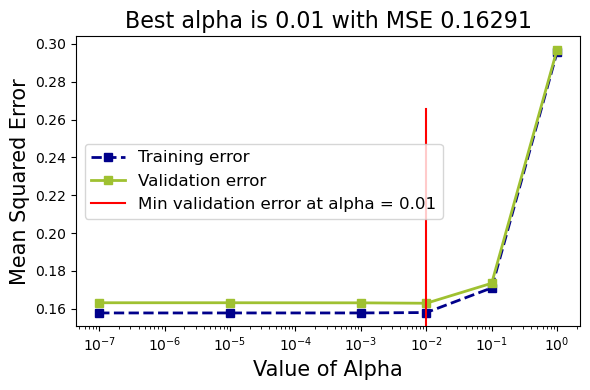

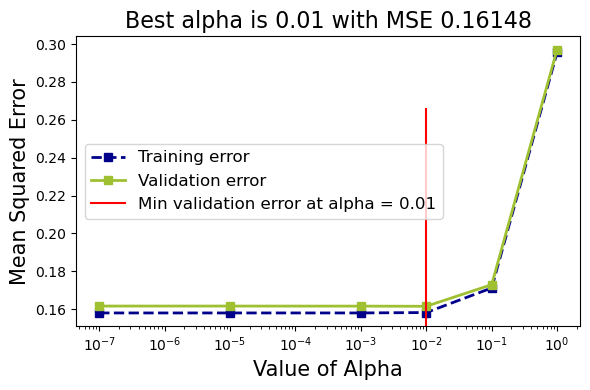

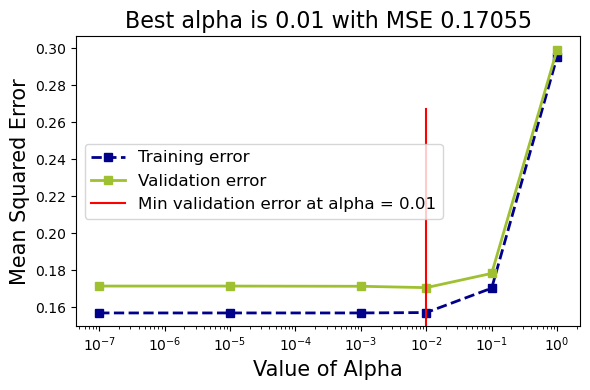

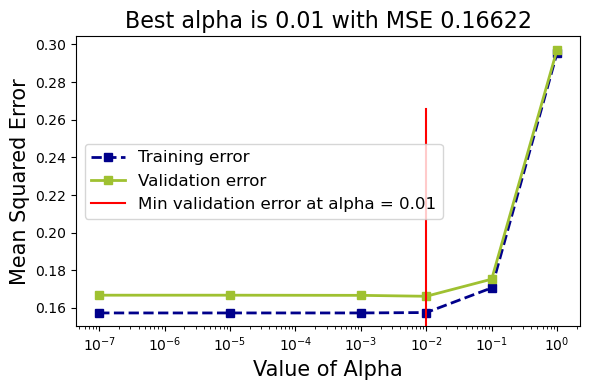

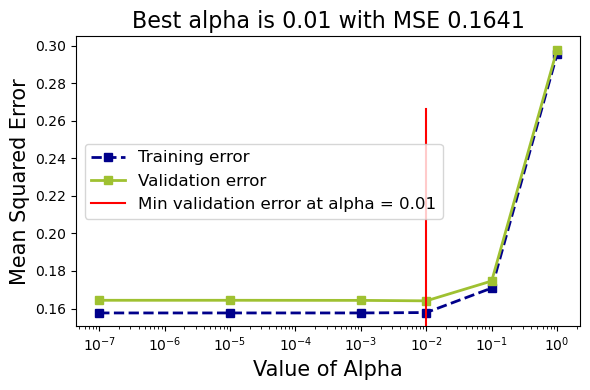

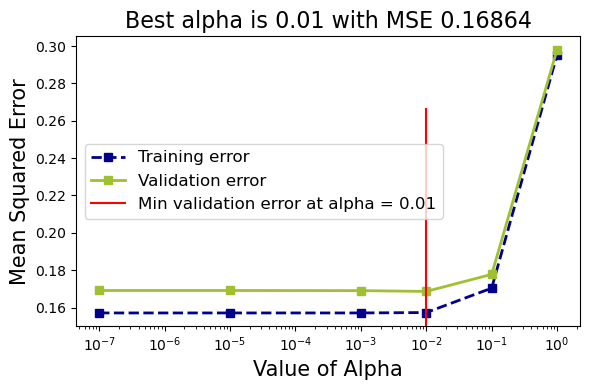

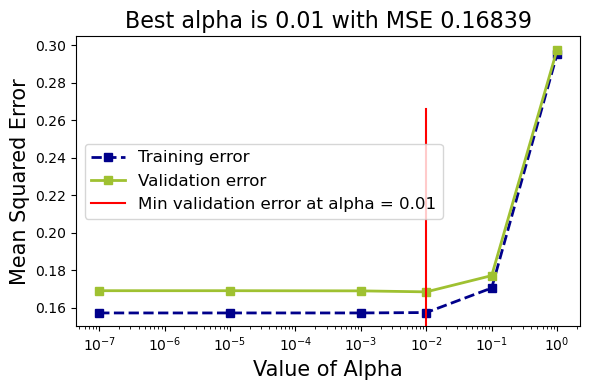

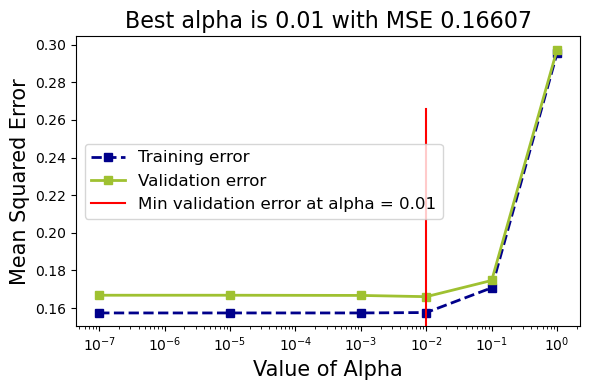

In [29]:
### edTest(test_cross_validation) ###
# Initialise a list to store the best alpha using cross validation for varying random states
best_cv_alpha = []

# Run a loop for different random_states
for rs in ran_state:
    
    # Get the train and validation error by calling the function reg_with_cross_validation
    training_error, validation_error = reg_with_cross_validation(rs)

    # Get the best mse from the validation_error list
    best_mse = min(validation_error)

    # Get the best alpha value based on the best mse
    best_parameter = alphas[validation_error.index(best_mse)]
 
    # Append the best alpha to the list
    best_cv_alpha.append(best_parameter)
    
    # Use the helper code given below to plot the graphs
    fig, ax = plt.subplots(figsize = (6,4))
    
    # Plot the training errors for each alpha value
    ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)
    
    # Plot the validation errors for each alpha value
    ax.plot(alphas,validation_error,'s-', label = 'Validation error',color ='#9FC131FF',linewidth=2 )

    # Draw a vertical line at the best parameter
    ax.axvline(best_parameter, 0, 0.75, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

    ax.set_xlabel('Value of Alpha',fontsize=15)
    ax.set_ylabel('Mean Squared Error',fontsize=15)
    ax.legend(loc = 'best',fontsize=12)
    bm = round(best_mse, 5)
    ax.set_title(f'Best alpha is {best_parameter} with MSE {bm}',fontsize=16)
    ax.set_xscale('log')
    plt.tight_layout()

In [30]:
#training_error, validation_error = reg_with_cross_validation(0)
#training_error, validation_error

In [31]:
#best_cv_alpha

In [32]:
# Use the helper code below to print your findings
pt = PrettyTable()

pt.field_names = ["Random State", "Best Alpha with Validation", "Best Alpha with Cross-Validation"]

for i in range(6):
    pt.add_row([ran_state[i], best_alpha[i], best_cv_alpha[i]])

print(pt)

+--------------+----------------------------+----------------------------------+
| Random State | Best Alpha with Validation | Best Alpha with Cross-Validation |
+--------------+----------------------------+----------------------------------+
|      0       |            0.01            |               0.01               |
|      10      |           1e-05            |               0.01               |
|      21      |            0.01            |               0.01               |
|      42      |             1              |               0.01               |
|      66      |           1e-05            |               0.01               |
|     109      |            0.01            |               0.01               |
+--------------+----------------------------+----------------------------------+


**What can you infer about cross-validation based on the previous analysis?**

**After marking, change the random states and alpha values. Run the code again. Comment on the results of regularization with simple validation and cross-validation.**